In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame as df

In [3]:
m=2
A=np.array([5, 0])
B=np.matrix([[0.5, 0], [0, 0.5]])
T_1=np.arange(1, 31)
T_2=np.arange(31, 84)


C=np.array([5, 3])
Pi_1=np.matrix(
                 [[0.5, 0.6], [0, 0.5]])
Pi_2=np.matrix(
                 [[0, 1], [0, 0]])

Y_0=np.linalg.solve(np.identity(2)-(B), A)
Y_1=np.linalg.solve(np.identity(2)-(Pi_1+Pi_2), C)

k=3

np.random.seed(0)

simulated_data = df({'y': [Y_0[0]],
                        'x_1': [Y_0[1]]})

for t in T_1:

    epsilon_t = np.random.normal(0, 1, m)

    Y_t = A + \
        np.matmul(B, np.array(simulated_data.loc[t-1])) + epsilon_t

    Y_t = df(Y_t, columns=['y', 'x_1'])

    simulated_data = pd.concat(
        [simulated_data, Y_t], ignore_index=True, axis=0)

# Step 4: Generate the time series for the second regime.
for t in T_2:

    epsilon_t = np.random.normal(0, 1, m)

    Y_t = C + np.matmul(Pi_1, simulated_data.loc[t-1]) + np.matmul(
        Pi_2, simulated_data.loc[t-2]) + epsilon_t

    Y_t = df([Y_t], columns=['y', 'x_1'])

    simulated_data = pd.concat(
        [simulated_data, Y_t], ignore_index=True, axis=0)


In [4]:
T_1 = np.arange(1, 31)
C_1 = [1, 2, 0.1]
T_2 = np.arange(31, 64)
C_2 = [10, 0.2, -0.5]

y_0 = C_1[0]
c = C_1[1]
phi = C_1[2]

# Regime 2
d = C_2[0]
phi_1 = C_2[1]
phi_2 = C_2[2]

# Step 1 (a): Set the seed.
np.random.seed(0)

simulated_data_A = []
# Step 1 (b): Declare y_0
simulated_data_SA = [y_0]

# Step 1 (c): Simulate the first regime.
for t in T_1:

    # Step 1 (c)(i): Generate and save y_t.
    epsilon_t = np.random.normal(loc=0, scale=1)

    y_t = c + phi*simulated_data_SA[t-1] + epsilon_t

    simulated_data_SA.append(y_t)

# Step 1 (d): Simulate the second regime.
for t in T_2:

    epsilon_t = np.random.normal(loc=0, scale=1)

    # Step 1 (d)(i): Generate and save y_t.
    y_t = d + phi_1*simulated_data_SA[t-1] + \
        phi_2*simulated_data_SA[t-2] + epsilon_t

    simulated_data_SA.append(y_t)

simulated_data_A.append(simulated_data_SA)
    

In [5]:
C_1 = [15, 0.01, 0.01]
t_simu_list = [50, 70]
C_2 = [-0.01, 0.1]
T = np.arange(1, 114)

S_0, gamma_1, sigma_1 = C_1
gamma_2, sigma_2 = C_2
T_max = max(T)

sim_C = []

for i in range(2):

    np.random.seed(i)

    simulated_S = [S_0]
    simulated_y = [0, 0, 0]

    t_simu = t_simu_list[i]

    T_1 = np.arange(1, t_simu+1)
    T_2 = np.arange(t_simu + 1, T_max + 1)

    for t in T_1:

        epsilon_t = np.random.normal(loc=0, scale=1)

        S_t = simulated_S[t-1] * np.exp((gamma_1 - (1/2)
                                        * sigma_1**2) * (1) + sigma_1 * epsilon_t)

        simulated_S.append(S_t)

        if t >= 3:
            y_t = np.log(S_t) - np.log(simulated_S[t-k])
            simulated_y.append(y_t)

    for t in T_2:

        epsilon_t = np.random.normal(loc=0, scale=1)

        S_t = simulated_S[t-1] * np.exp((gamma_2 - (1/2)
                                        * sigma_2**2) * (1) + sigma_2 * epsilon_t)

        simulated_S.append(S_t)

        y_t = np.log(S_t) - np.log(simulated_S[t-k])

        simulated_y.append(y_t)
    
    sim_C.append(simulated_S)

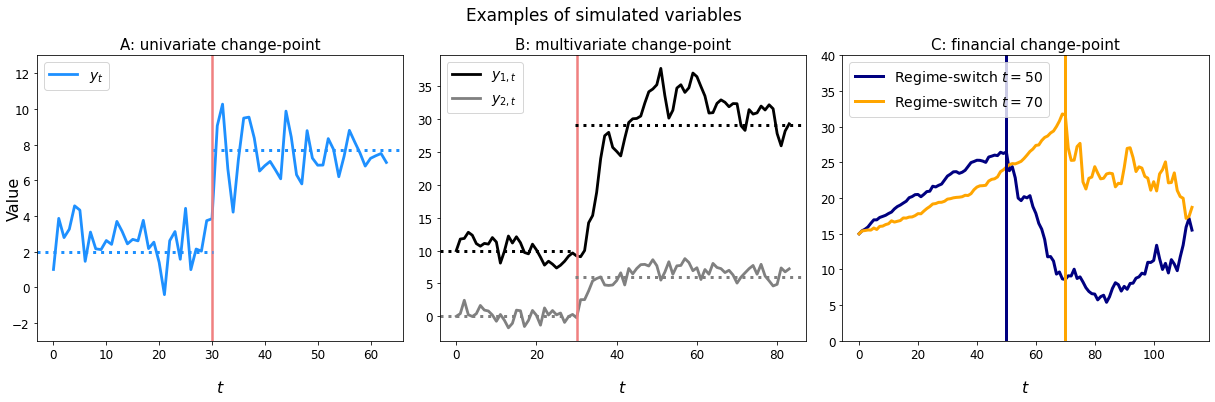

In [20]:
color_list_A = iter(['dodgerblue', 'mediumblue', 'steelblue'])
color_list_B = iter(['black', 'grey', 'mediumseagreen'])
color_list_C = iter(['navy', 'orange'])
label_list_C = iter([r"Regime-switch $t= 50$", r"Regime-switch $t= 70$"])

plt.rcParams["figure.figsize"] = (21,5.25)
fig, ax = plt.subplots(ncols = 3, gridspec_kw = {'wspace':0.1, 'hspace':0.1})

for i in range(1):

    if i == 2:
        Label_A = "System A"
        Label_B = "System B"
    else:
        Label_A = ""
        Label_B = ""

    ax[0].plot(simulated_data_A[i], color = next(color_list_A), linewidth = 2.8, label = r"$y_t$")
    ax[1].plot(simulated_data['y'], color = next(color_list_B), linewidth =2.8, label = r"$y_{1,t}$")
    ax[1].plot(simulated_data['x_1'], color = next(color_list_B), linewidth =2.8, label = r"$y_{2,t}$")

    ax[0].set_ylim(-3, 13)
    
    plt.xticks(fontsize = 10)

for i in range(2):
    ax[2].plot(sim_C[i], color =  next(color_list_C), linewidth = 3, label = next(label_list_C))


ax[2].set_ylim([0,40])
fig.suptitle("Examples of simulated variables", fontsize = 17, y = 1.01)
ax[0].set_title("A: univariate change-point", fontsize = 15)
ax[1].set_title("B: multivariate change-point", fontsize = 15)
ax[2].set_title("C: financial change-point", fontsize = 15)
ax[2].axvline(50, color = 'navy', linewidth = 3)
ax[2].axvline(70, color = 'orange', linewidth = 3)
# ax[0].set_ylabel(r"$y_t$", fontsize = 20, rotation = 0, labelpad =12)
ax[0].set_ylabel("Value", fontsize = 16, rotation = 90, labelpad =-10)
# ax[1].set_ylabel(r"$Y_t$", fontsize = 20, rotation = 0, labelpad =12)
# ax[2].set_ylabel(r"$S_t$", fontsize = 20, rotation = 0, labelpad =12)
ax[0].set_xlabel(r"$t$", fontsize = 16, rotation = 0, labelpad =18)
ax[1].set_xlabel(r"$t$", fontsize = 16, rotation = 0, labelpad =18)
ax[2].set_xlabel(r"$t$", fontsize = 16, rotation = 0, labelpad =18)
ax[2].legend(fontsize = 14, loc = 2);
ax[0].legend(fontsize = 14, loc = 2);
ax[1].legend(fontsize = 14, loc = 2);
ax[0].axvline(30, color = 'lightcoral', linewidth = 2.5)
ax[1].axvline(30, color = 'lightcoral', linewidth = 2.5)

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='major', labelsize=12)

ax[0].axhline(2, xmin = 0, xmax = 0.48, color = 'dodgerblue', linewidth = 3, linestyle = 'dotted')
ax[0].axhline(10/1.3, xmin = 0.482, xmax = 1, color = 'dodgerblue', linewidth = 3, linestyle = 'dotted')

RYANARSE=0.37
ax[1].axhline(Y_1[0], xmin = RYANARSE, xmax = 1, color = 'black', linewidth = 3, linestyle = 'dotted')
ax[1].axhline(Y_0[0], xmin = 0, xmax = RYANARSE, color = 'black', linewidth = 3, linestyle = 'dotted')

ax[1].axhline(Y_0[1], xmin = 0, xmax = RYANARSE, color = 'grey', linewidth = 3, linestyle = 'dotted')
ax[1].axhline(Y_1[1], xmin = RYANARSE, xmax = 1, color = 'grey', linewidth = 3, linestyle = 'dotted')

